In [ ]:
import tensorflow as tf
import numpy as np
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
import os
import shutil

In [ ]:
Root_dir = '/content'
Data_root = os.path.join(Root_dir,'archive')

In [ ]:
if os.path.exists(Data_root):
  shutil.rmtree(Data_root)

In [ ]:
import zipfile

with zipfile.ZipFile(os.path.join(Root_dir,'archive.zip'),'r') as file:
  file.extractall(Data_root)

In [ ]:
import pandas as pd

data = pd.read_csv(os.path.join(Data_root,'energy_efficiency_data.csv'))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


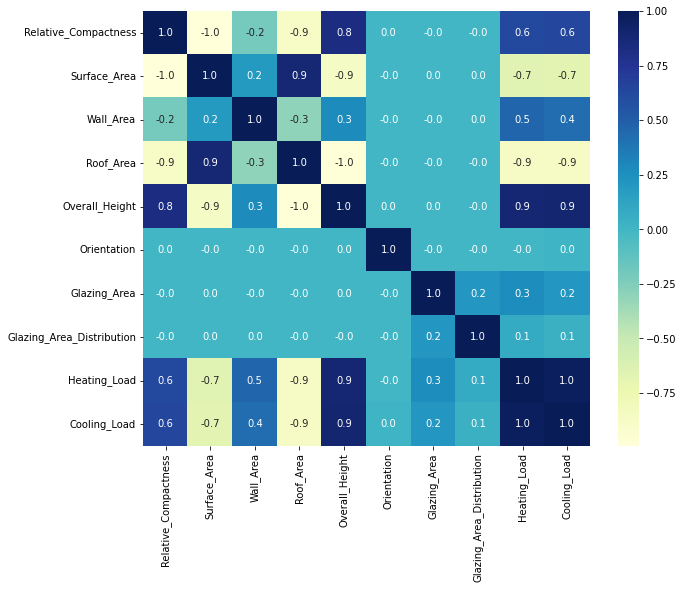

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),annot=True,fmt='.1f',cmap='YlGnBu')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X= data.drop(['Heating_Load','Cooling_Load'],axis='columns')
Y1 = data['Heating_Load']
Y2 = data['Cooling_Load']

x_train, x_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X,Y1,Y2,test_size=0.2,random_state = 30)
MinMax = MinMaxScaler()
x_train = MinMax.fit_transform(x_train)
x_test = MinMax.transform(x_test)

In [ ]:
# model = Sequential([Dense(50,input_shape=(x_train.shape[1],),activation='sigmoid'),
#                     Dense(1,activation='linear')])
# model.summary()
# model.compile(optimizer=tf.keras.optimizers.SGD(),loss='mse',metrics=['mae'])

In [ ]:
# hist = model.fit(x_train,y1_train,epochs = 600)

In [ ]:
# model.evaluate(x_test,y1_test)

In [ ]:
# import random
# y1_list = y1_test.tolist()
# sum_mae = 0
# for i in range(30):
#   rand = random.randint(0,x_test.shape[0]-1)
#   res = model.predict(np.array([x_test[rand]]))
#   print(res,' ::: ', y1_list[rand])
#   mae = abs(res - y1_list[rand])
#   sum_mae += mae

# print('30_res : ', sum_mae)

In [ ]:
# import matplotlib.pyplot as plt

# # plt.plot(hist.history['mae'])
# plt.plot(hist.history['loss'])
# plt.title('model')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['loss'], loc='upper left')
# plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

param_grid = {'n_estimators':[375, 400, 425],'max_depth':[70,75,80,85],'min_samples_leaf':[1,5,10]}

RFR = RandomForestRegressor()
kf = KFold(n_splits=5,shuffle=True, random_state=55)
Grid_Search = GridSearchCV(RFR, param_grid, n_jobs=-1, cv=kf, scoring = 'neg_mean_absolute_error')
Grid_Search.fit(x_train,y1_train)

print(Grid_Search.best_score_)
print(Grid_Search.best_params_)

-0.3623662951486085
{'max_depth': 85, 'min_samples_leaf': 1, 'n_estimators': 400}


In [ ]:
RFR_train = RandomForestRegressor(n_estimators = 400, max_depth = 85)

RFR_train.fit(x_train,y1_train)
print(RFR_train.score(x_test,y1_test))

RFR_train.fit(x_train,y2_train)
print(RFR_train.score(x_test,y2_test))

0.9977730037973286
0.9738357263554615
